In [3]:
import webbpsf
import numpy as np
import matplotlib.pyplot as plt

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-062 CANNOT BE CHECKED AGAINST ONLINE VERSION


In [4]:
print(webbpsf.__version__)

1.1.1


In [5]:
def analytical_psf(filt,writetofile,instrumentb
    if instrument == 'nircam':
        inst = webbpsf.NIRCam()
    elif instrument == 'miri':
        inst = webbpsf.MIRI()
    inst.filter =  filt
    if instrument == 'nircam':
        psf = inst.calc_psf(fov_pixels=200,oversample=1) # returns an astropy.io.fits.HDUlist containing PSF and header
    elif instrument == 'miri':
        psf = inst.calc_psf(fov_pixels=100,oversample=1)
    plt.imshow(psf[0].data)             # display it on screen yourself, or
    webbpsf.display_psf(psf) 
    psf[0].data = psf[0].data/psf[0].data.max()
    psf.writeto(writetofile,overwrite=True)# use this convenient function to make a nice log plot with labeled axes

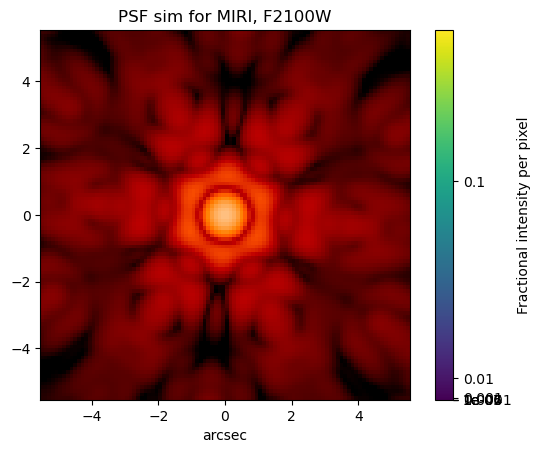

In [6]:
filters = ['F115W','F150W','F200W','F277W','F356W','F444W','F560W','F770W','F1000W','F1280W','F1500W','F1800W','F2100W']
PSFs = ['nircamf115wpsf.fits','nircamf150wpsf.fits','nircamf200wpsf.fits','nircamf277wpsf.fits','nircamf356wpsf.fits','nircamf444wpsf.fits','mirif560wpsf.fits','mirif770wpsf.fits','mirif1000wpsf.fits','mirif1280wpsf.fits','mirif1500wpsf.fits','mirif1800wpsf.fits','mirif2100wpsf.fits']
for i in range(len(filters)):
    if i < 6:
        instrument = 'nircam'
        analytical_psf(filters[i],PSFs[i],instrument)
    elif i >= 6:
        instrument = 'miri'
        analytical_psf(filters[i],PSFs[i],instrument)